### Import thư viện và dữ liệu mẫu

In [31]:
# ═══════════════════════════════════════════════════════════
#  THƯ VIỆN CHÍNH 
# ═══════════════════════════════════════════════════════════
import matplotlib.pyplot as plt   # Vẽ biểu đồ chính
import numpy as np                # Tạo dữ liệu số học, mảng
import pandas as pd               # Làm việc với bảng dữ liệu
import seaborn as sns             # Làm đẹp biểu đồ (heatmap, violin...)

# Thiết lập kiểu đẹp ngay từ đầu (tùy chọn nhưng rất khuyến khích)
plt.style.use('seaborn-v0_8-whitegrid')   # hoặc 'ggplot', 'bmh', 'fivethirtyeight'
sns.set_palette("husl")                   # Màu sắc đẹp tự động cho seaborn

# ═══════════════════════════════════════════════════════════
#  TẠO DỮ LIỆU MẪU 
# ═══════════════════════════════════════════════════════════

# Thiết lập seed để kết quả giống nhau mỗi lần chạy
np.random.seed(42)

# 1. Dữ liệu cho biểu đồ đường & phân tán (sin, cos)
x = np.linspace(0, 10, 100)       # 100 điểm từ 0 đến 10
y_sin = np.sin(x)                 # Hàm sin
y_cos = np.cos(x)                 # Hàm cos

# 2. Dữ liệu cho biểu đồ cột & tròn
categories = ['Sản phẩm A', 'Sản phẩm B', 'Sản phẩm C', 'Sản phẩm D', 'Sản phẩm E']
sales_2024 = [4, 7, 2, 9, 5]       # Đơn vị: nghìn sản phẩm (hoặc bất kỳ)

# 3. Dữ liệu thời gian (doanh thu, lợi nhuận theo tháng)
months = pd.date_range(start='2025-01', periods=12, freq='M')
monthly_data = pd.DataFrame({
    'Tháng': months,
    'Doanh thu (triệu)': np.random.randint(100, 500, 12),
    'Lợi nhuận (triệu)': np.random.randint(20, 150, 12)
})

# 4. Dữ liệu cho histogram, boxplot, violin
np.random.seed(123)
height_data = np.random.normal(170, 10, 1000)                    # Chiều cao người VN
groups_for_box_violin = [
    np.random.normal(0, 1, 100),    # Nhóm 1
    np.random.normal(2, 1.5, 100),  # Nhóm 2
    np.random.normal(-1, 0.8, 100), # Nhóm 3
    np.random.normal(3, 2, 100)     # Nhóm 4
]

# In thử để kiểm tra
print("Dữ liệu đã sẵn sàng!")
print("- Biểu đồ đường: x, y_sin, y_cos")
print("- Biểu đồ cột/tròn: categories, sales_2024")
print("- Biểu đồ thời gian: monthly_data")
print("- Phân phối: height_data, groups_for_box_violin")

Dữ liệu đã sẵn sàng!
- Biểu đồ đường: x, y_sin, y_cos
- Biểu đồ cột/tròn: categories, sales_2024
- Biểu đồ thời gian: monthly_data
- Phân phối: height_data, groups_for_box_violin


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_86976\3827118154.py:30: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months = pd.date_range(start='2025-01', periods=12, freq='M')


### ==========1. Biểu đồ đường (Line Plot) ===============
**Mục tiêu**: Thể hiện xu hướng thay đổi của dữ liệu theo thời gian hoặc theo một trục liên tục.
Thường dùng cho dữ liệu thời gian (time series).

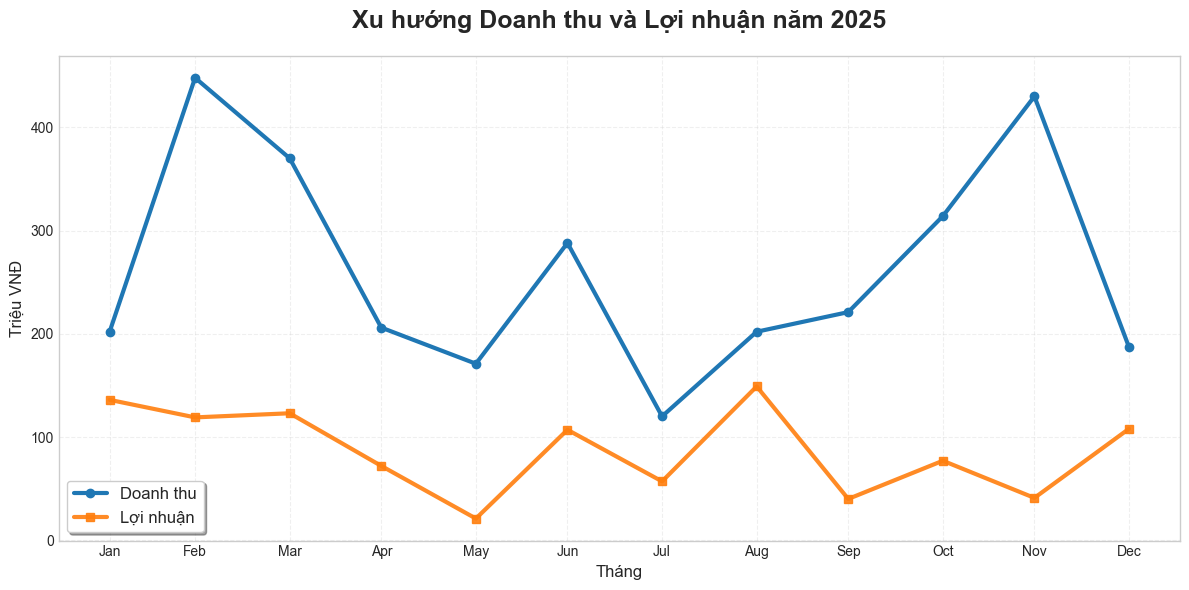

In [ ]:
plt.figure(figsize=(12, 6))

# Vẽ 2 đường: Doanh thu và Lợi nhuận
plt.plot(monthly_data['Tháng'], monthly_data['Doanh thu (triệu)'],
         label='Doanh thu', 
         color='#1f77b4', linewidth=3, marker='o', markersize=6)

plt.plot(monthly_data['Tháng'], monthly_data['Lợi nhuận (triệu)'],
         label='Lợi nhuận', 
         color='#ff7f0e', linewidth=3, marker='s', markersize=6, alpha=0.9)

# Tùy chỉnh đẹp
plt.title('Xu hướng Doanh thu và Lợi nhuận năm 2025', 
          fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Tháng', fontsize=12)
plt.ylabel('Triệu VNĐ', fontsize=12)
plt.legend(fontsize=12, frameon=True, fancybox=True, shadow=True)

# Định dạng trục X đẹp hơn (hiển thị tháng 1 - tháng 12)
plt.xticks(monthly_data['Tháng'], [m.strftime('%b') for m in monthly_data['Tháng']], rotation=0)

# Thêm lưới nhẹ và làm đẹp nền
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()

plt.show()


### ==========2. Biểu đồ cột đứng (Bar Chart)===============
**Mục tiêu**: So sánh giá trị giữa các nhóm/category khác nhau (ví dụ: doanh số sản phẩm A, B, C).
Thường dùng cho dữ liệu rời rạc, dễ thấy sự chênh lệch (tăng/giảm) giữa các cột.

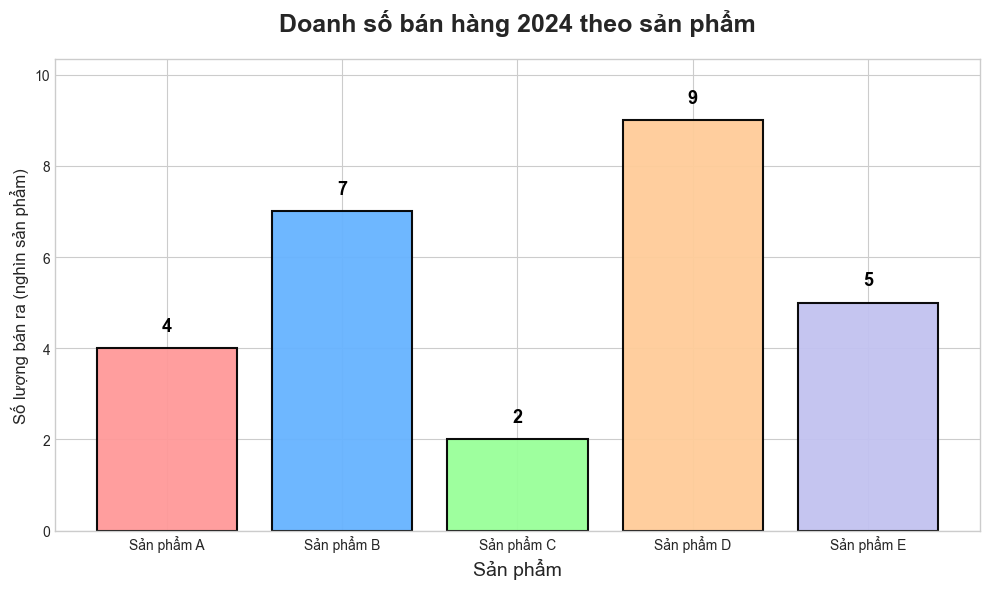

In [33]:
plt.figure(figsize=(10, 6))

plt.bar(categories, sales_2024,
        color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0'],
        edgecolor='black',
        linewidth=1.5,
        alpha=0.95)

plt.title('Doanh số bán hàng 2024 theo sản phẩm', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Sản phẩm', fontsize=14)
plt.ylabel('Số lượng bán ra (nghìn sản phẩm)', fontsize=12)

# Hiển thị giá trị trên đầu mỗi cột
for i, v in enumerate(sales_2024):
    plt.text(i, v + 0.3, str(v), 
             ha='center', va='bottom', fontweight='bold', fontsize=13, color='black')

plt.ylim(0, max(sales_2024) * 1.15)  # để chữ không bị cắt
plt.tight_layout()
plt.show()

### ==========3. Biểu đồ cột ngang (Horizontal Bar Chart)===============
**Mục tiêu**: So sánh giá trị giữa các nhóm/category khác nhau, đặc biệt khi tên category dài (dễ đọc hơn theo chiều ngang).
Thường dùng cho dữ liệu rời rạc, giúp dễ dàng sắp xếp theo thứ tự tăng/giảm.

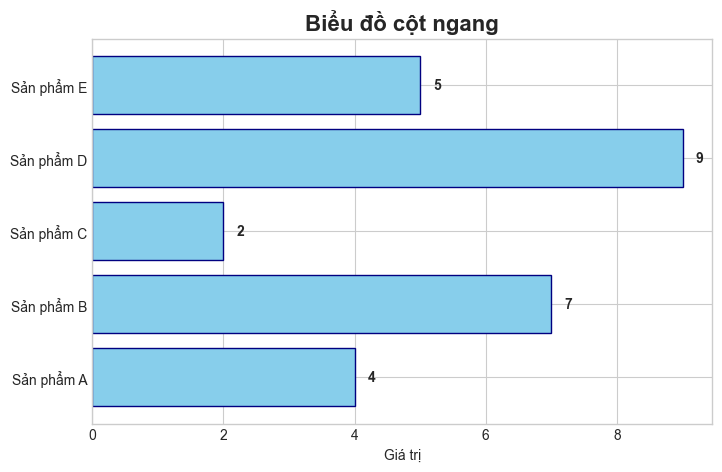

In [34]:
values = sales_2024
plt.figure(figsize=(8, 5))
plt.barh(categories, values, color='skyblue', edgecolor='navy')
plt.title('Biểu đồ cột ngang', fontsize=16, fontweight='bold')
plt.xlabel('Giá trị')
for i, v in enumerate(values):
    plt.text(v + 0.2, i, str(v), va='center', fontweight='bold')
plt.show()

### ==========4. Biểu đồ phân tán (Scatter Plot)===============
**Mục tiêu**: Thể hiện mối quan hệ giữa 2 biến số định lượng → xem có tương quan không, xu hướng tăng/giảm ra sao (ví dụ: dùng đường hồi quy để tính hệ số Pearson r như trong code).
Ví dụ kinh điển: Mối liên hệ giữa **chi phí quảng cáo** và **doanh số bán hàng**, với r ≈ 0.93 cho thấy tương quan dương mạnh.

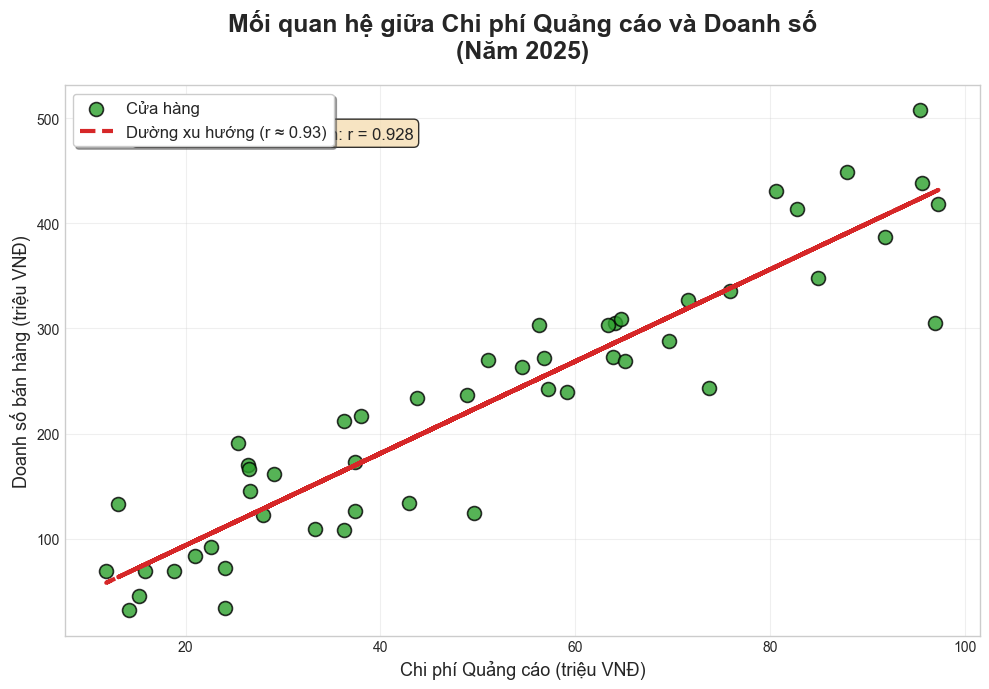

In [35]:
# Tạo dữ liệu thực tế: Chi phí quảng cáo vs Doanh số (triệu đồng)
np.random.seed(42)
advertising_spend = np.random.uniform(10, 100, 50)                    # Chi phí QC từ 10 đến 100 triệu
sales_revenue = advertising_spend * 4.5 + np.random.normal(0, 50, 50)  # Có tương quan dương mạnh + nhiễu

plt.figure(figsize=(10, 7))

# Vẽ scatter với màu sắc, kích thước, độ trong suốt đẹp
plt.scatter(advertising_spend, 
            sales_revenue,
            c='#2ca02c',              # Màu xanh lá đẹp
            s=100,                    # Kích thước điểm
            alpha=0.8,                
            edgecolors='black', 
            linewidth=1.2,
            label='Cửa hàng')

# Thêm đường xu hướng (trend line) để dễ thấy tương quan
z = np.polyfit(advertising_spend, sales_revenue, 1)
p = np.poly1d(z)
plt.plot(advertising_spend, p(advertising_spend), 
         color='#d62728', linewidth=3, linestyle='--', 
         label=f'Dường xu hướng (r ≈ {np.corrcoef(advertising_spend, sales_revenue)[0,1]:.2f})')

# Làm đẹp toàn bộ biểu đồ
plt.title('Mối quan hệ giữa Chi phí Quảng cáo và Doanh số\n(Năm 2025)', 
          fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Chi phí Quảng cáo (triệu VNĐ)', fontsize=13)
plt.ylabel('Doanh số bán hàng (triệu VNĐ)', fontsize=13)

plt.legend(fontsize=12, loc='upper left', frameon=True, fancybox=True, shadow=True)
plt.grid(True, alpha=0.3, linestyle='-')
plt.tight_layout()

# Hiển thị hệ số tương quan ngay trên đồ thị (rất pro!)
plt.text(15, 480, f'Hệ số tương quan Pearson: r = {np.corrcoef(advertising_spend, sales_revenue)[0,1]:.3f}', 
         fontsize=12, bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.8))

plt.show()

### ==========5. Biểu đồ tròn (Pie Chart)===============
**Mục tiêu**: 
Thể hiện tỷ lệ phần trăm (%) của từng thành phần trong tổng thể (tổng = 100%).
Rất trực quan khi muốn trả lời câu hỏi: “Phần nào chiếm bao nhiêu % tổng doanh số / thị phần / ngân sách…?”
Phù hợp khi số lượng nhóm ≤ 7–8 nhóm, tránh rối mắt.

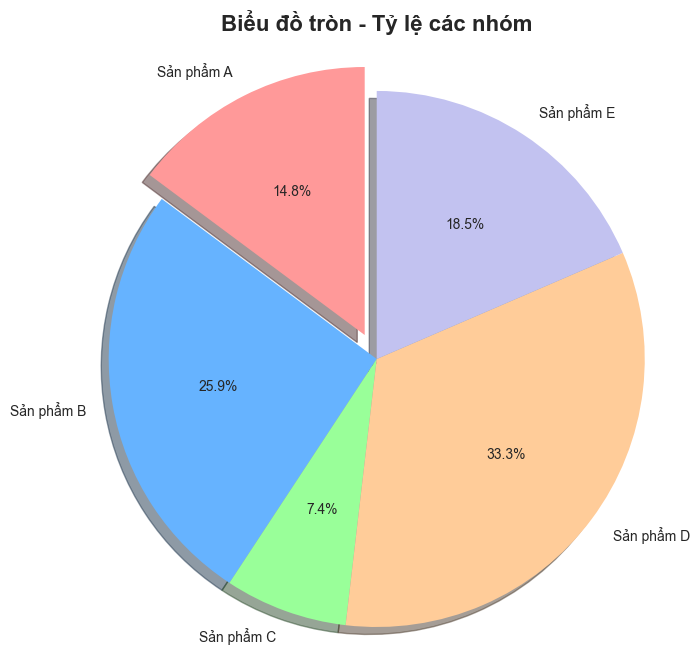

In [36]:
plt.figure(figsize=(8, 8))
plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=90,
        colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'],
        explode=(0.1,0,0,0,0), shadow=True)
plt.title('Biểu đồ tròn - Tỷ lệ các nhóm', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()

### ==========6. Biểu đồ Histogram===============
**Mục tiêu chính**:
- Hiển thị **phân phối (distribution)** của một biến số định lượng liên tục.
- Giúp trả lời nhanh các câu hỏi:
  - Dữ liệu có phân phối chuẩn (hình chuông) không?
  - Dữ liệu bị lệch trái/phải (skewed) hay có nhiều đỉnh (multimodal)?
  - Độ tập trung và độ phân tán của dữ liệu ra sao?
  - Có giá trị ngoại lai (outlier) rõ rệt không?

**Ứng dụng thực tế rất phổ biến**:
- Phân phối chiều cao, cân nặng, lương nhân viên
- Phân phối điểm thi, thời gian phản hồi khách hàng
- Kiểm tra giả thuyết “dữ liệu có phân phối chuẩn” trước khi dùng các kiểm định thống kê tham số

**Mẹo đọc histogram**:
- Trục ngang (x): Giá trị của biến
- Trục dọc (y): Tần suất (số lượng) hoặc mật độ (density)
- Số lượng bins (cột): thường 20–50 là đẹp, quá ít → mất chi tiết, quá nhiều → nhiễu

**So sánh với các biểu đồ khác**:
| Biểu đồ       | Dùng khi dữ liệu là…          | Mục tiêu chính                  |
|---------------|-------------------------------|----------------------------------|
| Histogram     | 1 biến liên tục               | Xem phân phối                   |
| Bar chart     | Nhiều nhóm rời rạc            | So sánh giá trị giữa các nhóm   |
| Boxplot/Violin| 1 hoặc nhiều nhóm liên tục    | So sánh phân phối giữa các nhóm |

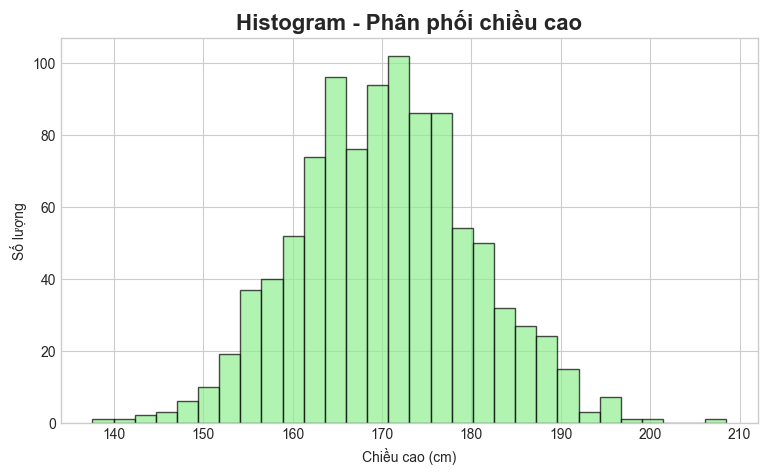

In [37]:
data_random = np.random.normal(170, 10, 1000)
plt.figure(figsize=(9, 5))
plt.hist(data_random, bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title('Histogram - Phân phối chiều cao', fontsize=16, fontweight='bold')
plt.xlabel('Chiều cao (cm)')
plt.ylabel('Số lượng')
plt.show()

### ==========7. Biểu đồ Boxplot===============

**Mục tiêu chính**:
- Tóm tắt **phân phối dữ liệu** chỉ bằng **5 số thống kê quan trọng** (Five-number summary):
  1. Giá trị nhỏ nhất (Minimum – không tính outlier)
  2. Tứ phân vị thứ nhất **Q1** (25%)
  3. Trung vị **Q2** (50% – Median)
  4. Tứ phân vị thứ ba **Q3** (75%)
  5. Giá trị lớn nhất (Maximum – không tính outlier)
- Phát hiện **ngoại lai (outliers)** một cách trực quan và khoa học (dựa trên quy tắc IQR × 1.5)

```
┌───────▲───────┐  ← Max (không tính outlier)
│       │       │
│    ┌──┴──┐    │  ← Phần hộp = 50% dữ liệu tập trung
│    │     │    │
│    │     │    │
│    └─────┘    │  ← Q3 ──┐
│       ●       │  ← Median (Q2)
│    ┌─────┐    │  ← Q1 ───┤ IQR = Q3 - Q1
│    │     │    │
└────┴─────┴────┘
│     │
Whiskers (râu)
●   ●   ●   ← Outliers (ngoại lai)

```


**Ứng dụng thực tế**:
- So sánh điểm thi giữa các lớp, các trường
- So sánh lương nhân viên theo phòng ban, theo trình độ
- So sánh thời gian giao hàng giữa các khu vực
- Phát hiện dữ liệu bất thường (fraud detection, lỗi đo lường…)

**So sánh nhanh với Histogram & Violin**:
| Biểu đồ     | Ưu điểm                                    | Nhược điểm                      |
|-------------|--------------------------------------------|---------------------------------|
| Boxplot     | Nhỏ gọn, dễ so sánh nhiều nhóm, phát hiện outlier cực tốt | Không thấy hình dạng phân phối chi tiết |
| Histogram   | Thấy rõ hình dạng (chuông, lệch, 2 đỉnh…)   | Khó so sánh nhiều nhóm cùng lúc |
| Violin      | Kết hợp cả hai ưu điểm trên → hiện đại nhất| Hơi khó hiểu với người mới      |


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_86976\2689274600.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_box, labels=['Nhóm 1','Nhóm 2','Nhóm 3','Nhóm 4'], patch_artist=True,


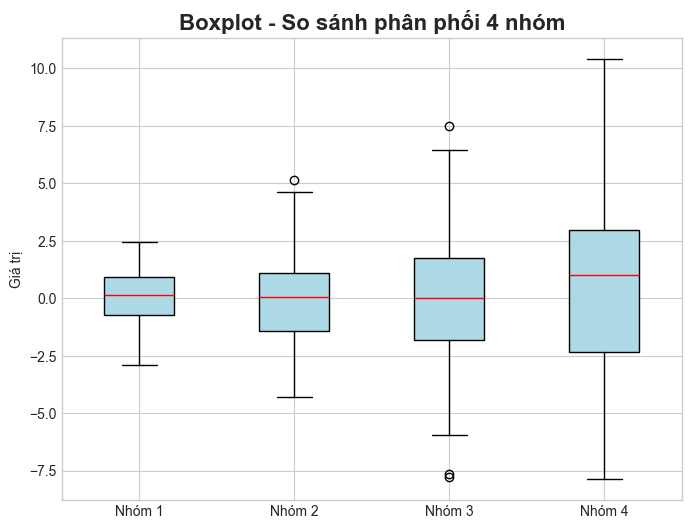

In [38]:
data_box = [np.random.normal(0, std, 100) for std in range(1, 5)]
plt.figure(figsize=(8, 6))
plt.boxplot(data_box, labels=['Nhóm 1','Nhóm 2','Nhóm 3','Nhóm 4'], patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='black'),
            medianprops=dict(color='red'))
plt.title('Boxplot - So sánh phân phối 4 nhóm', fontsize=16, fontweight='bold')
plt.ylabel('Giá trị')
plt.show()

### ==========8. Biểu đồ vùng chồng (Stacked Area Chart)===============

**`Mục tiêu`**: Thể hiện sự đóng góp của các thành phần (nhóm dữ liệu) vào tổng thể theo thời gian hoặc một trục liên tục.
Thường dùng cho dữ liệu thời gian để xem tỷ lệ phần trăm hoặc giá trị tích lũy của từng nhóm, giúp dễ dàng quan sát xu hướng tổng và sự thay đổi tỷ trọng.

**Lưu ý**: Tổng giá trị luôn là 100% nếu dùng chế độ tỷ lệ (stacked=100), hoặc giá trị tuyệt đối. Tránh dùng với quá nhiều nhóm để biểu đồ không bị rối.

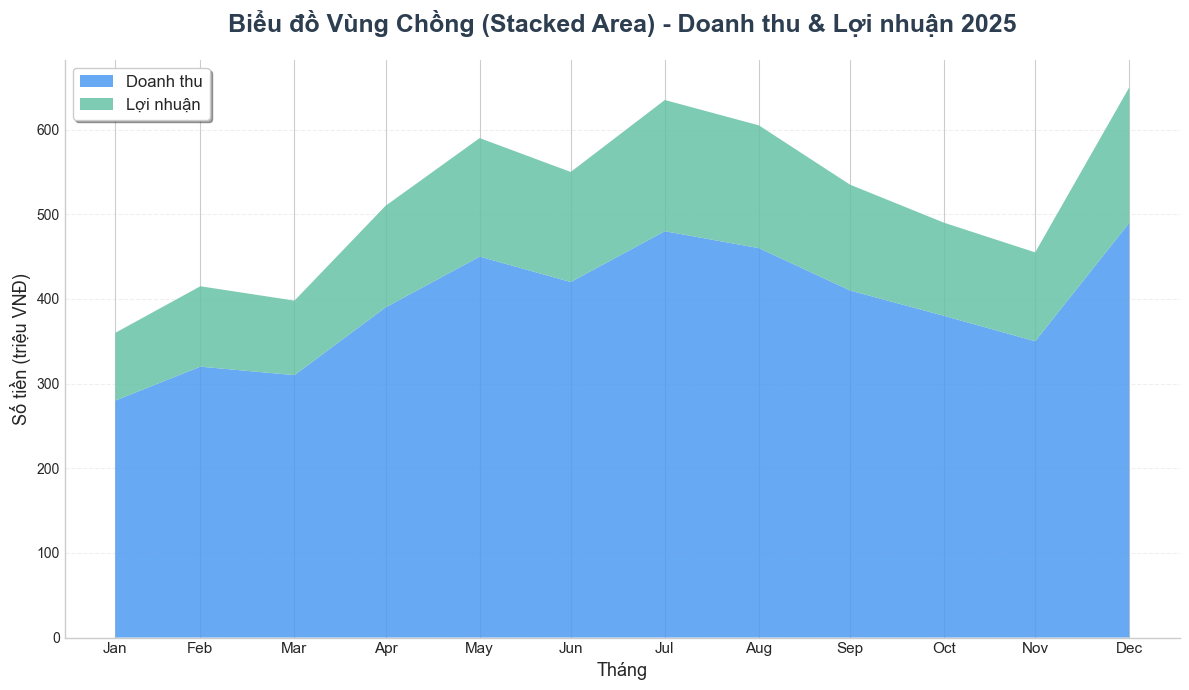

In [39]:


# ==================== KHÔI PHỤC DỮ LIỆU CHUẨN (copy từ phần đầu notebook) ====================
np.random.seed(42)
months = pd.date_range(start='2025-01', periods=12, freq='ME')  # 'ME' thay cho 'M' để tránh warning
monthly_data = pd.DataFrame({
    'Tháng': months,
    'Doanh thu (triệu)': np.random.randint(100, 500, 12),
    'Lợi nhuận (triệu)': np.random.randint(20, 150, 12)
})

# Nếu bạn muốn dữ liệu đẹp hơn, cố định 
monthly_data['Doanh thu (triệu)'] = [280, 320, 310, 390, 450, 420, 480, 460, 410, 380, 350, 490]
monthly_data['Lợi nhuận (triệu)'] = [80, 95, 88, 120, 140, 130, 155, 145, 125, 110, 105, 160]

# ==================== VẼ STACKED AREA PLOT ====================
plt.figure(figsize=(12, 7))

# Dùng monthly_data trực tiếp
plt.stackplot(monthly_data['Tháng'], 
              monthly_data['Doanh thu (triệu)'], 
              monthly_data['Lợi nhuận (triệu)'],
              labels=['Doanh thu', 'Lợi nhuận'],
              colors=['#4e9af1', '#66c2a5'],   # màu xanh dương + xanh lá 
              alpha=0.85)

# Làm đẹp cực mạnh
plt.title('Biểu đồ Vùng Chồng (Stacked Area) - Doanh thu & Lợi nhuận 2025', 
          fontsize=18, fontweight='bold', pad=20, color='#2c3e50')
plt.xlabel('Tháng', fontsize=13)
plt.ylabel('Số tiền (triệu VNĐ)', fontsize=13)

# Format trục x đẹp: chỉ hiện tên tháng
plt.xticks(monthly_data['Tháng'], 
           [m.strftime('%b') for m in monthly_data['Tháng']], 
           rotation=0, fontsize=11)

plt.legend(loc='upper left', fontsize=12, frameon=True, fancybox=True, shadow=True)

# Grid nhẹ + style 
plt.grid(True, axis='y', alpha=0.3, linestyle='--')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

### ==========9. Biểu đồ Heatmap===============

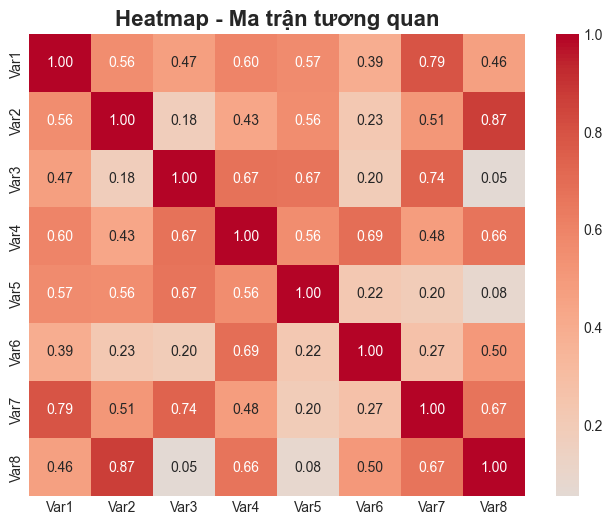

In [40]:
corr = np.random.rand(8, 8)
corr = (corr + corr.T) / 2
np.fill_diagonal(corr, 1)

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt='.2f',
            xticklabels=[f'Var{i}' for i in range(1,9)],
            yticklabels=[f'Var{i}' for i in range(1,9)])
plt.title('Heatmap - Ma trận tương quan', fontsize=16, fontweight='bold')
plt.show()

### ==========10. Biểu đồ Cột Nhóm (Grouped Bar Chart)===============

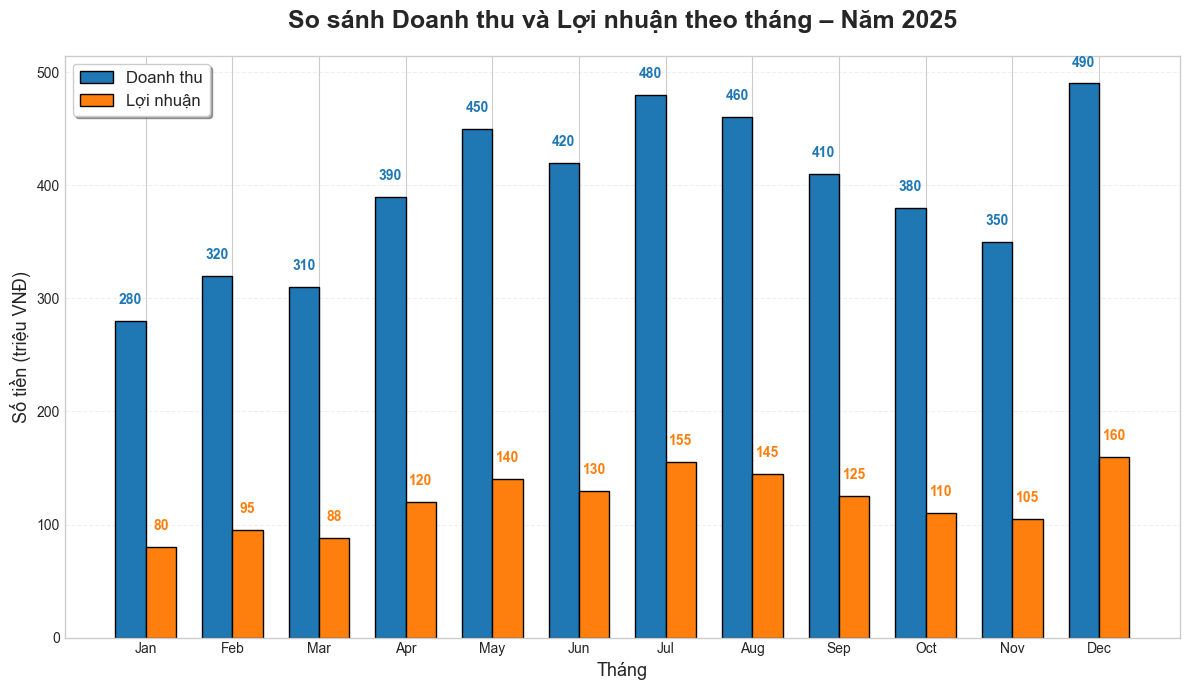

In [41]:
# Dùng luôn monthly_data đã có sẵn ở phần đầu
# monthly_data đã có cột: 'Tháng', 'Doanh thu (triệu)', 'Lợi nhuận (triệu)'

# Chuẩn bị dữ liệu cho biểu đồ cột nhóm
months_labels = [m.strftime('%b') for m in monthly_data['Tháng']]  # Jan, Feb, Mar...
doanh_thu = monthly_data['Doanh thu (triệu)'].values
loi_nhuan = monthly_data['Lợi nhuận (triệu)'].values

x = np.arange(len(months_labels))   # vị trí 0,1,2,...,11
width = 0.35                        # độ rộng mỗi cột

plt.figure(figsize=(12, 7))

# Vẽ 2 nhóm cột: Doanh thu (xanh dương) và Lợi nhuận (cam)
plt.bar(x - width/2, doanh_thu, width, 
        label='Doanh thu', color='#1f77b4', edgecolor='black')
plt.bar(x + width/2, loi_nhuan, width, 
        label='Lợi nhuận', color='#ff7f0e', edgecolor='black')

# Làm đẹp – kiểu pro nhưng cực đơn giản
plt.title('So sánh Doanh thu và Lợi nhuận theo tháng – Năm 2025', 
          fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Tháng', fontsize=13)
plt.ylabel('Số tiền (triệu VNĐ)', fontsize=13)
plt.xticks(x, months_labels, rotation=0)
plt.legend(fontsize=12, frameon=True, fancybox=True, shadow=True)
plt.grid(True, axis='y', alpha=0.3, linestyle='--')

# Thêm số liệu trên đầu cột để đọc cực nhanh
for i, (dt, ln) in enumerate(zip(doanh_thu, loi_nhuan)):
    plt.text(i - width/2, dt + 15, str(dt), ha='center', fontweight='bold', color='#1f77b4')
    plt.text(i + width/2, ln + 15, str(ln), ha='center', fontweight='bold', color='#ff7f0e')

plt.tight_layout()
plt.show()